In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Pune_rent.csv')

In [3]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms


In [4]:
df.seller_type.unique()

array(['OWNER', 'AGENT', 'BUILDER'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [6]:
df.describe()

,bedroom,area
count,22800.000000,22800.000000
mean,1.873465,1041.622588
std,0.793189,588.915990
min,1.000000,100.000000
25%,1.000000,650.000000
50%,2.000000,960.000000
75%,2.000000,1200.000000
max,8.000000,7500.000000


In [7]:
df.isnull().sum()

seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         171
dtype: int64

In [8]:
percent_missing =df.isnull().sum()*100/len(df)
percent_missing.sort_values(ascending=False)

bathroom         0.75
seller_type      0.00
bedroom          0.00
layout_type      0.00
property_type    0.00
locality         0.00
price            0.00
area             0.00
furnish_type     0.00
dtype: float64

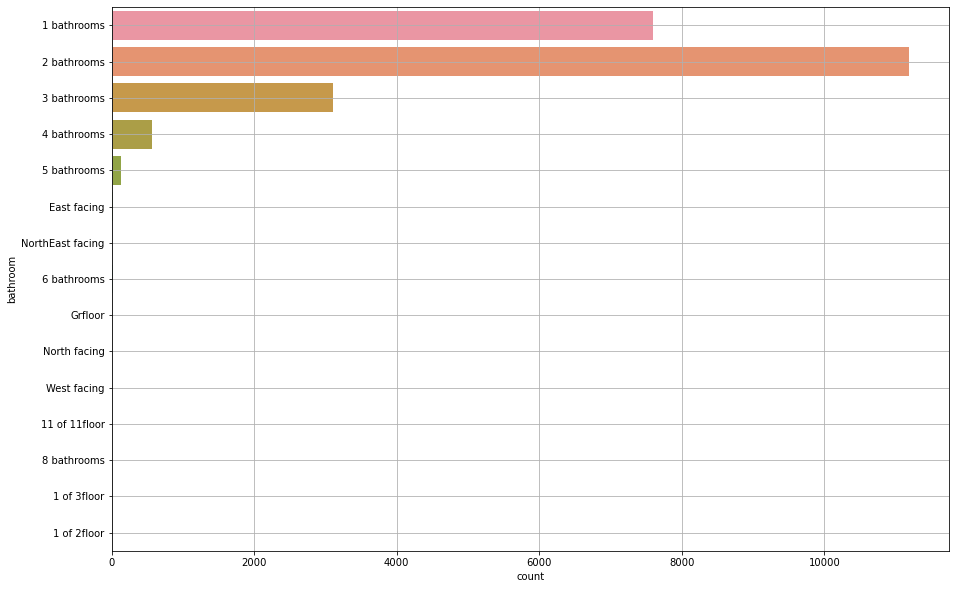

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data = df , y='bathroom')
plt.grid()
plt.show()

In [10]:
data = df.copy()
data['bathroom'].fillna(df['bathroom'].value_counts().idxmax(),inplace=True)

In [11]:
data.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms


In [14]:
col = data[['seller_type','layout_type','property_type','locality','furnish_type','bathroom']]

In [15]:
for i in col:
    data[i]=le.fit_transform(data[i])
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,2,1,0,1,235,"6,750",450,2,0
1,2,2,0,0,428,"18,000",916,2,4
2,2,3,0,0,425,"16,500",1085,1,5
3,2,1,1,4,185,"8,000",250,0,0
4,2,2,0,0,443,"25,000",1005,1,4


In [95]:
df1 =df.copy()

In [96]:
df1

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2 bathrooms
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3 bathrooms
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1 bathrooms
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,"13,250",650,Semi-Furnished,1 bathrooms
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,"7,000",350,Unfurnished,1 bathrooms
22797,OWNER,1,BHK,Apartment,Kothrud,"8,500",389,Semi-Furnished,1 bathrooms
22798,AGENT,1,BHK,Apartment,Wakad,"16,500",670,Semi-Furnished,2 bathrooms


In [97]:
df1['price'] = df1['price'].apply(lambda x: x.replace(',','')).astype('float')

In [98]:
df1

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1 bathrooms
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2 bathrooms
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3 bathrooms
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,1 bathrooms
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2 bathrooms
...,...,...,...,...,...,...,...,...,...
22795,OWNER,1,BHK,Apartment,Chinchwad,13250.0,650,Semi-Furnished,1 bathrooms
22796,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,7000.0,350,Unfurnished,1 bathrooms
22797,OWNER,1,BHK,Apartment,Kothrud,8500.0,389,Semi-Furnished,1 bathrooms
22798,AGENT,1,BHK,Apartment,Wakad,16500.0,670,Semi-Furnished,2 bathrooms


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  int32 
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  int32 
 3   property_type  22800 non-null  int32 
 4   locality       22800 non-null  int32 
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  int32 
 8   bathroom       22800 non-null  int32 
dtypes: int32(6), int64(2), object(1)
memory usage: 1.0+ MB


In [17]:
data['price'] = data['price'].apply(lambda x: x.replace(',','')).astype('float')

In [18]:
data.describe()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
count,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000
mean,0.553772,1.873465,0.047105,0.346316,230.127193,18802.768139,1041.622588,1.254474,2.881404
std,0.884289,0.793189,0.211869,1.057567,143.919078,11862.576539,588.915990,0.739431,2.109812
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,100.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,123.000000,12000.000000,650.000000,1.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,187.000000,16000.000000,960.000000,1.000000,4.000000
75%,2.000000,2.000000,0.000000,0.000000,398.000000,22000.000000,1200.000000,2.000000,4.000000
max,2.000000,8.000000,1.000000,5.000000,458.000000,99000.000000,7500.000000,2.000000,14.000000


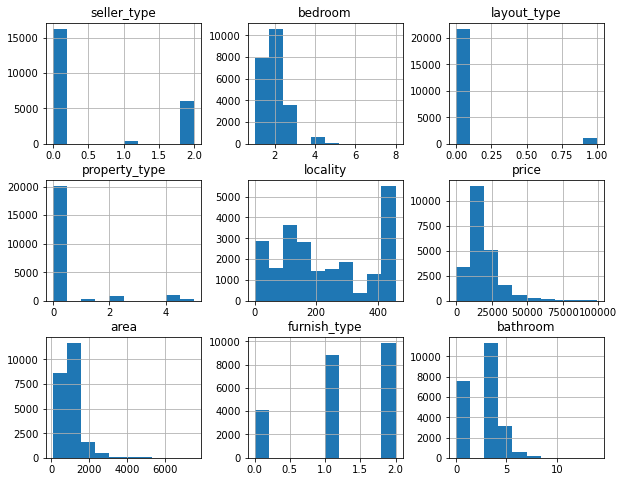

In [19]:
data.hist(figsize=(10,8))
plt.show()

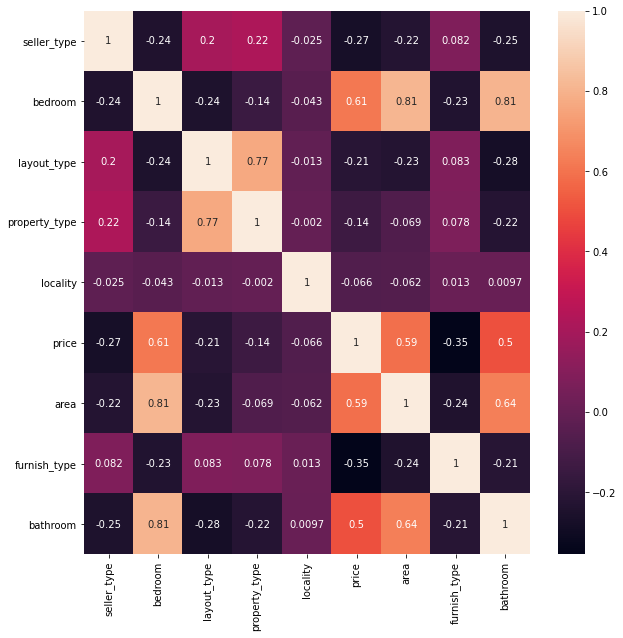

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

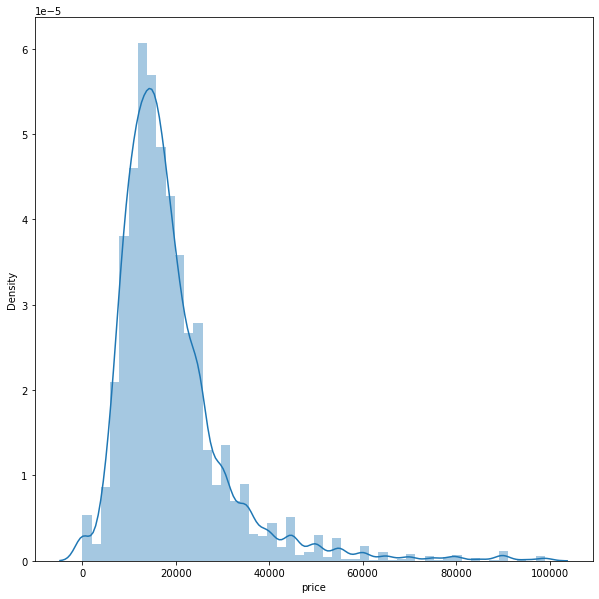

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(data.price)
plt.show()

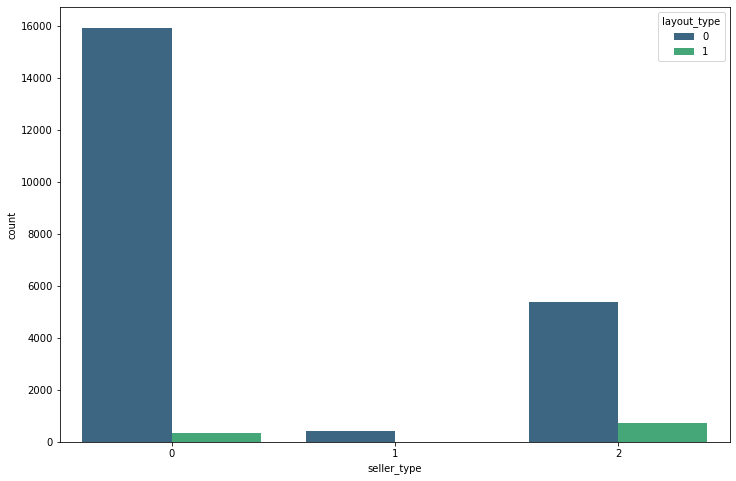

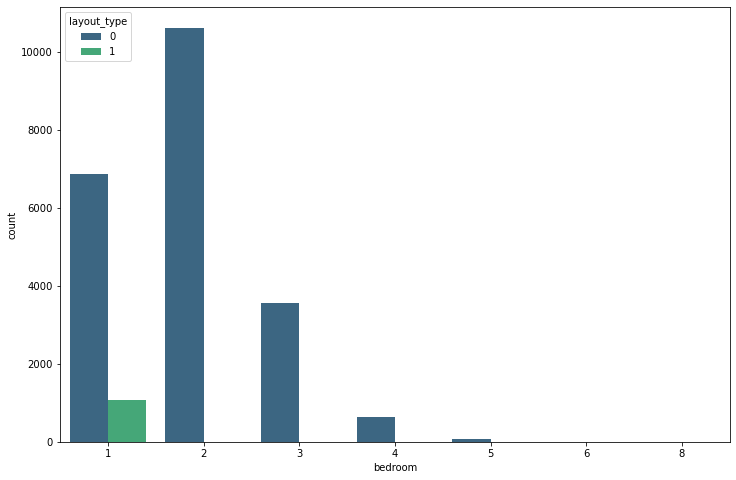

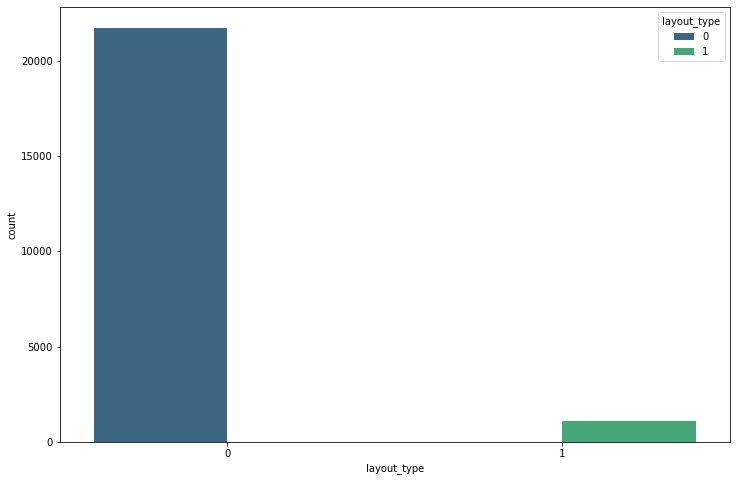

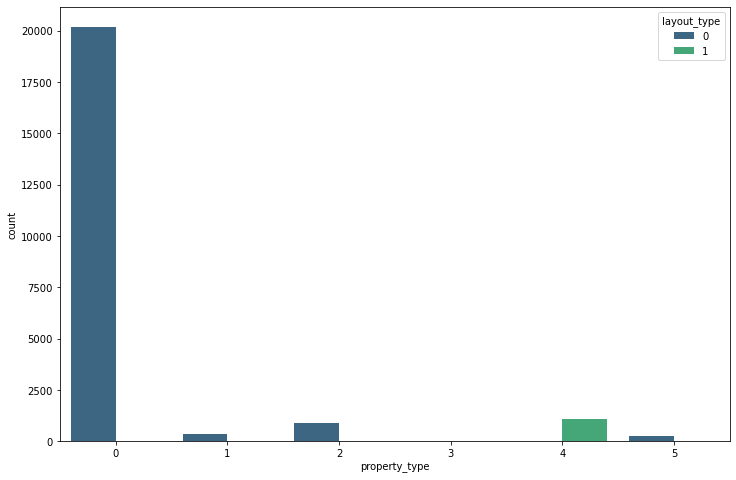

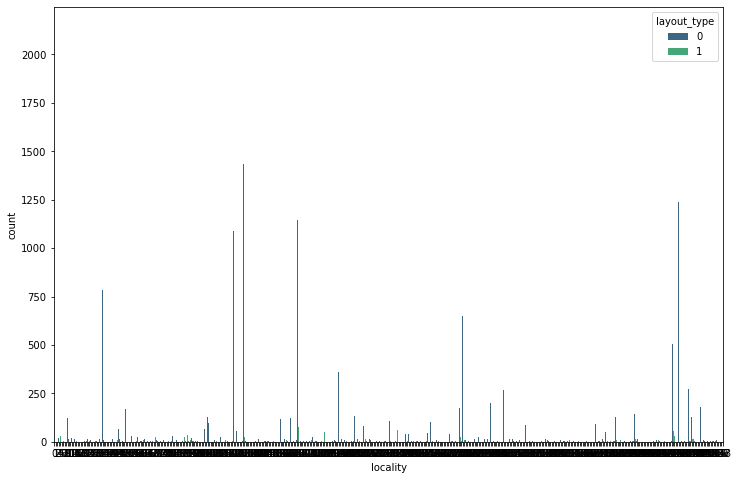

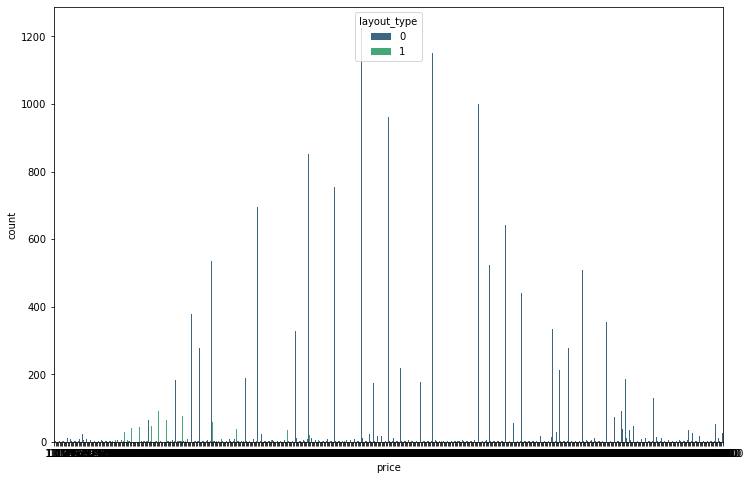

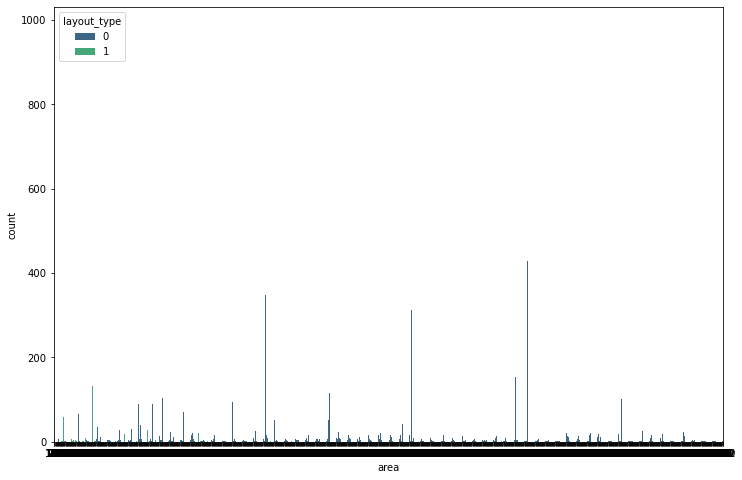

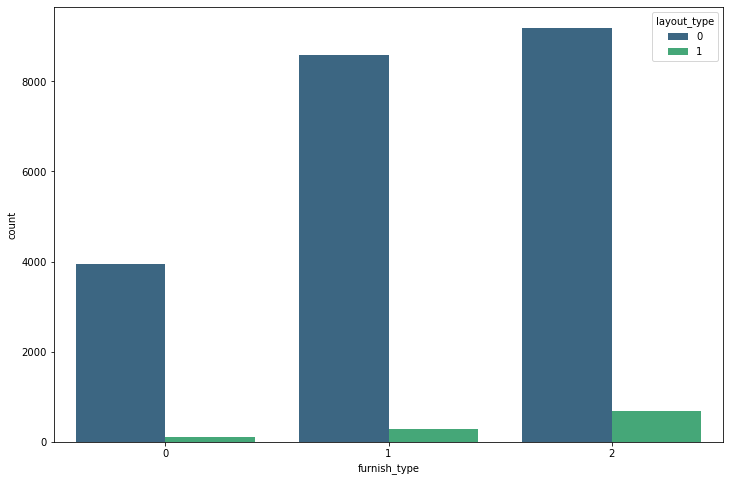

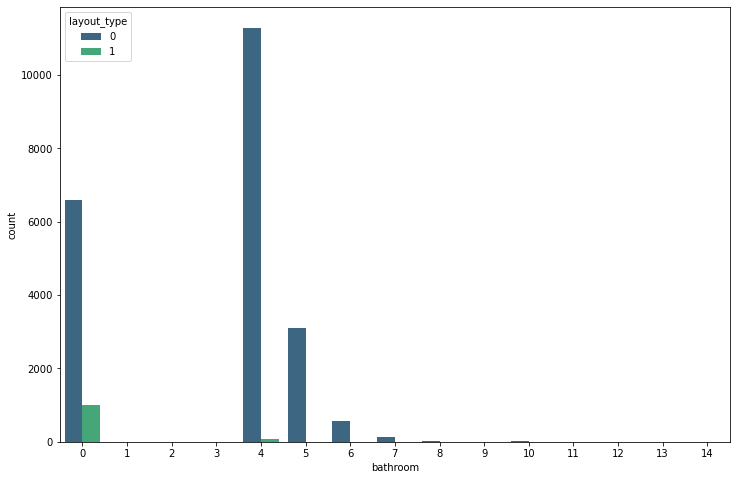

In [22]:
columns = data.columns
for i in  columns:
    plt.figure(figsize=(12,8))
    sns.countplot(data=data,x=data[i][0:],hue='layout_type',palette='viridis')
    plt.show()

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
scaler = RobustScaler()

In [25]:
X= pd.DataFrame(scaler.fit_transform(data.drop(['price'],axis = 1),),columns = [ 'furnish_type','seller_type','locality','bedroom', 'layout_type', 'property_type',
       'area', 'bathroom'])

In [26]:
X.head()

,furnish_type,seller_type,locality,bedroom,layout_type,property_type,area,bathroom
0,1.0,-1.0,0.0,1.0,0.174545,-0.927273,1.0,-1.00
1,1.0,0.0,0.0,0.0,0.876364,-0.080000,1.0,0.00
2,1.0,1.0,0.0,0.0,0.865455,0.227273,0.0,0.25
3,1.0,-1.0,1.0,4.0,-0.007273,-1.290909,-1.0,-1.00
4,1.0,0.0,0.0,0.0,0.930909,0.081818,0.0,0.00


In [27]:
y = data.price

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [30]:
X_train.shape

(17100, 8)

In [31]:
X_test.shape

(5700, 8)

In [32]:
y_train.shape

(17100,)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.score(X_train, y_train)

0.4576797130309187

In [109]:
y_predict = lr.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
mse = mean_squared_error(y_test, y_predict)

In [39]:
print('Linear Regression MSE:', mse)

Linear Regression MSE: 78666680.60284586


In [40]:
from sklearn import metrics

In [41]:
# make prediction with the fitted model
linear_pred = lr.predict(X_test) 

# score the model on the train set
print('Train score: {}\n'.format(lr.score(X_train,y_train)))

# score the model on the test set
print('Test score: {}\n'.format(lr.score(X_test,y_test)))

# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))

# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.4576797130309187

Test score: 0.4659795845211929

Overall model accuracy: 0.4659795845211929

Mean Squared Error: 78666680.60284586


In [42]:
data.nunique()

seller_type         3
bedroom             7
layout_type         2
property_type       6
locality          459
price             497
area             1275
furnish_type        3
bathroom           15
dtype: int64

In [43]:
from sklearn.linear_model import Ridge 

In [44]:
RidgeReg = Ridge(alpha = 0.001)

In [45]:
RidgeReg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [46]:
RidgeReg.score(X_train, y_train)

0.45767971303090915

In [47]:
from sklearn.linear_model import Lasso

In [48]:
LassoReg = Lasso(alpha = 1)

In [49]:
LassoReg.fit(X_train, y_train)

Lasso(alpha=1)

In [50]:
LassoReg.score(X_train, y_train)

0.4576793181181017

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gbr = GradientBoostingRegressor(learning_rate = 0.25, n_estimators = 500)

In [53]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25, n_estimators=500)

In [54]:
gbr.score(X_train, y_train)

0.8584940190033787

In [65]:
data.price.

15000.0    1241
18000.0    1156
12000.0    1089
20000.0    1002
16000.0     969
           ... 
44840.0       1
16499.0       1
23600.0       1
84500.0       1
17900.0       1
Name: price, Length: 497, dtype: int64

## top favourite area

In [105]:
 a = df1.nlargest(10,['price'])
a

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
3219,AGENT,4,BHK,Apartment,New Kalyani Nagar,99000.0,3562,Furnished,3 bathrooms
3260,AGENT,4,BHK,Apartment,Kalyani Nagar,99000.0,4812,Furnished,4 bathrooms
3261,AGENT,4,BHK,Apartment,Kalyani Nagar,99000.0,4812,Furnished,4 bathrooms
3267,AGENT,4,BHK,Apartment,Kalyani Nagar,99000.0,4812,Furnished,4 bathrooms
3268,AGENT,4,BHK,Apartment,Kalyani Nagar,99000.0,4812,Furnished,4 bathrooms
3282,AGENT,4,BHK,Apartment,New Kalyani Nagar,99000.0,3562,Furnished,3 bathrooms
3360,AGENT,4,BHK,Apartment,Kalyani Nagar,99000.0,4812,Furnished,4 bathrooms
3361,AGENT,4,BHK,Apartment,New Kalyani Nagar,99000.0,3562,Furnished,3 bathrooms
3365,AGENT,4,BHK,Apartment,New Kalyani Nagar,99000.0,3562,Furnished,4 bathrooms
3366,AGENT,4,BHK,Apartment,New Kalyani Nagar,99000.0,3562,Furnished,4 bathrooms


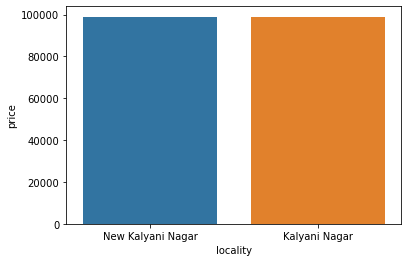

In [117]:
sns.barplot(x='locality',y='price',data=a)
plt.show()

<AxesSubplot:title={'center':'Top 10 rented flat locality By price'}, xlabel='locality'>

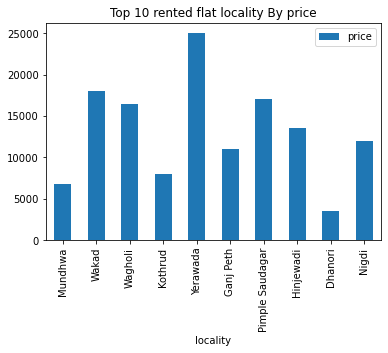

In [107]:
df1.iloc[:10].plot.bar(x = 'locality', y = 'price', title = 'Top 10 rented flat locality By price')


<AxesSubplot:title={'center':'Top 10 rented flat locality By Quantity'}, xlabel='price'>

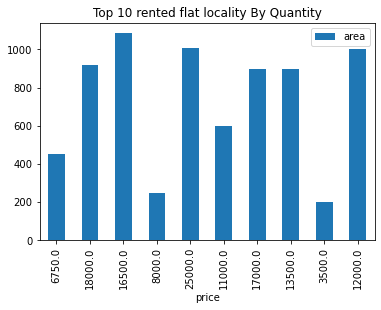

In [108]:
df1.iloc[:10].plot.bar(y = 'area', x = 'price', title = 'Top 10 rented flat locality By Quantity')

In [123]:
XNew=[[1.0,-1.0,0.0,1.0,0.174545,-0.927273,1.0,-1.00]]

In [124]:
y_predict = lr.predict(XNew)

In [125]:
y_predict

array([6943.10513126])